# Timeseries related coverages demo

In this notebook we use the backend API to retrieve a time series and then plot it, along with its related coverages

In [8]:
%matplotlib widget

import httpx
import matplotlib.pyplot as plt
import pandas as pd

coverage_identifier = "tas_absolute_value_ensemble-rcp26-DJF"
point_coords = "POINT(11.5469 44.9524)"
date_range = "../.."
api_url = f"http://webapp:5001/api/v2/coverages/time-series/{coverage_identifier}"


def _parse_to_dataframe(time_series: dict):
    df = pd.DataFrame.from_records(time_series["values"])
    df["datetime"] = pd.to_datetime(df["datetime"])
    df.set_index("datetime", inplace=True)
    return df    

In [ ]:
raw_response = httpx.get(
    api_url,
    params={
        "coords": point_coords,
        "datetime": date_range,
        "include_coverage_data": True,
        "include_observation_data": False,
        "coverage_data_smoothing": [
            "NO_SMOOTHING",
            "MOVING_AVERAGE_11_YEARS",
        ],
        "include_coverage_uncertainty": False,
        "include_coverage_related_data": True,
    }
)
try:
    raw_response.raise_for_status()
except httpx.HTTPStatusError as err:
    print(raw_response.json())
    raise

raw_series = raw_response.json()["series"]

series = {s["name"]: s for s in raw_series}

dfs = {v["name"]: _parse_to_dataframe(v) for v in series.values()}

### Plotting

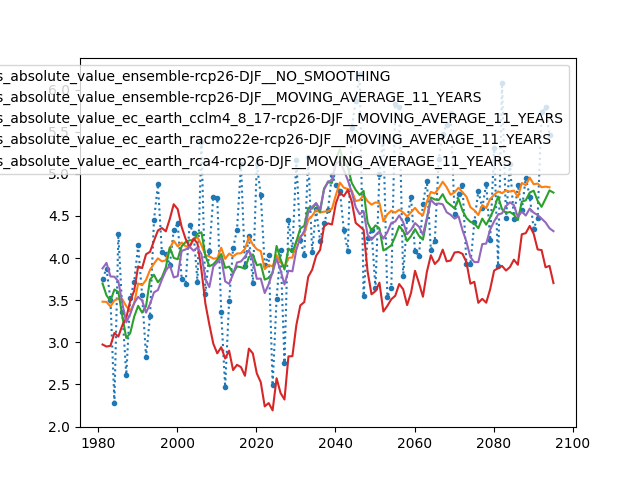

In [31]:
fig, ax = plt.subplots()

raw_tas_line, = ax.plot(dfs[f"{coverage_identifier}__NO_SMOOTHING"], label=f"{coverage_identifier}__NO_SMOOTHING")
raw_tas_line.set_linestyle(":")
raw_tas_line.set_marker(".")

alread_plotted = (
    f"{coverage_identifier}__NO_SMOOTHING",
)
for name, df in dfs.items():
    if name not in alread_plotted and "11_YEARS" in name:
        ax.plot(df, label=name)


ax.legend()

In [26]:
ax.clear()